## 1 Input Citra Fundus

In [ ]:
import os
import cv2
import numpy as np

dataset_dir = r'C:\Users\BIOINFO 7\Skripsi_Fundus Retina\AMD_EfficientNet\GAN (Trial 1)'

data = []
categories = ['Normal_GAN (Trial 1)','AMD_GAN(Trial1)']
img_size = 296

for category in categories:
    path = os.path.join(dataset_dir, category)
    class_num = categories.index(category)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img))
            #print(img_array.shape)
            new_array = cv2.resize(img_array, (img_size, img_size))
            data.append([new_array, class_num])
        except Exception as e:
            pass

print('Jumlah image data: {0}'.format(len(data)))

Jumlah image data: 710


## 2 Data Preprocessing

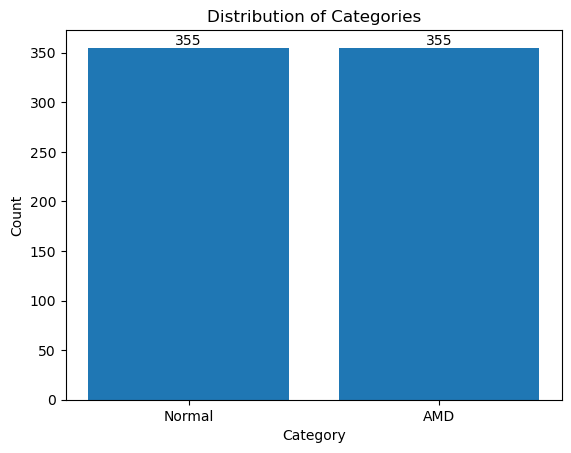

In [ ]:
import matplotlib.pyplot as plt

# Hitung jumlah data untuk setiap kategori
normal_count = sum(1 for _, label in data if label == 0)
amd_count = sum(1 for _, label in data if label == 1)

# Nama kategori
categories = ['Normal', 'AMD']

# Jumlah data untuk setiap kategori
counts = [normal_count, amd_count]

# Gambar bar chart
plt.bar(categories, counts)

# Tambahkan label dan judul
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Categories')

for i in range(len(categories)):
    plt.text(i, counts[i], str(counts[i]), ha='center', va='bottom')

# Tampilkan plot
plt.show()

## 3 Data Preparation & Data Splitting

In [ ]:
X = []
y = []

for features, label in data:
    X.append(features)
    y.append(label)

X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# defining the ratio of train-val-test data .
train_ratio = 0.80
val_ratio = 0.10
test_ratio = 0.10

# splitting data into train-val-test data .
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = (1 - train_ratio), random_state = 39)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = test_ratio/(test_ratio + val_ratio), random_state = 39)

---Training Dataset---


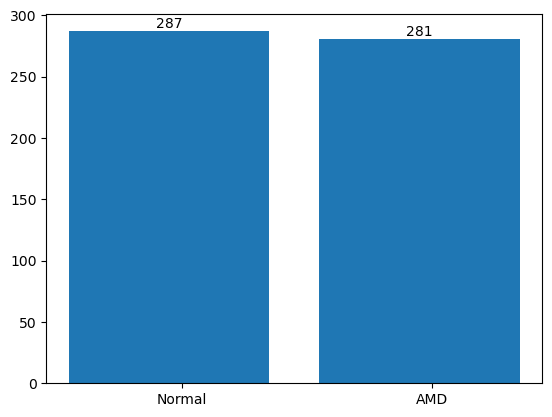

---Validation Dataset---


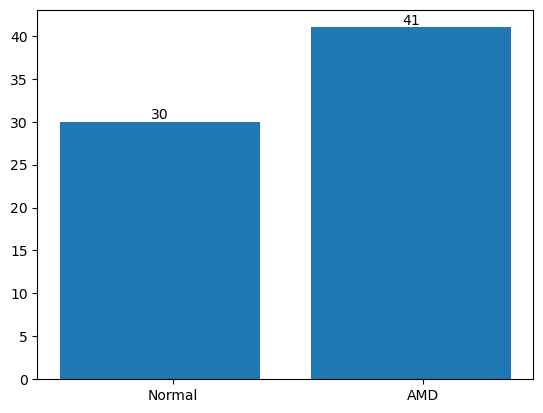

---Test Dataset---


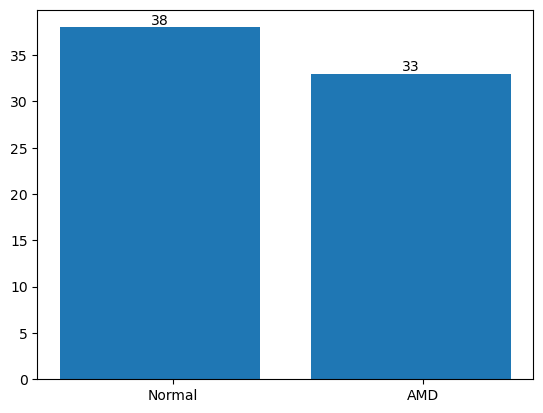

In [ ]:
# data distribution visualization .
a = 0; b = 0; c = 0; d = 0; e = 0; f = 0

for i in range(len(y_train)):
    if y_train[i] == 0:
        a += 1
    else:
        b += 1
for i in range(len(y_val)):
    if y_val[i] == 0:
        c += 1
    else:
        d += 1
for i in range(len(y_test)):
    if y_test[i] == 0:
        e += 1
    else:
        f += 1

data1 = np.array([a, b])
data2 = np.array([c, d])
data3 = np.array([e, f])
dataplot = [data1, data2, data3]
jumlah_AMD = [a, c, e]
jumlah_Normal = [b, d, f]
split = ['Training', 'Validation', 'Test']

for i in range(len(dataplot)):
    positions = np.arange(2)
    plt.bar(positions, dataplot[i], 0.8)
    plt.xticks(positions + 0.05, ('Normal', 'AMD'))
    print('---{0} Dataset---'.format(split[i]))
    plt.text(positions[0], dataplot[i][0], str(jumlah_AMD[i]), ha='center', va='bottom')
    plt.text(positions[1], dataplot[i][1], str(jumlah_Normal[i]), ha='center', va='bottom')
    plt.show()

## 4 Modelling CNN & Training Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam
import numpy as np

# Set level log TensorFlow
tf.get_logger().setLevel('ERROR')

In [ ]:
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Membuat model EfficientNet B0 tanpa lapisan klasifikasi (include_top=False)
base_model = EfficientNetB3(weights='imagenet', include_top=False)
base_model.trainable = False #supaya weight tidak ditrain ulang

# Menentukan output dari model EfficientNet B1 yang akan dijadikan input ke lapisan berikutnya
x = base_model.output

# Menambahkan Global Average Pooling Layer di atas output EfficientNet B1
x = GlobalAveragePooling2D()(x)

# Menambahkan lapisan Dense sebagai output layer
predictions = Dense(2, activation='softmax')(x)

# Menggabungkan model EfficientNet B1 dengan lapisan-lapisan yang telah ditambahkan
model = Model(inputs=base_model.input, outputs=predictions)

# Mengompilasi model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Menampilkan ringkasan model`
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, None, None, 3)        7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, None, None, 3)        0         ['normalization[0][0]']   

                                                                                                  
 block2a_expand_conv (Conv2  (None, None, None, 144)      3456      ['block1b_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block2a_expand_bn (BatchNo  (None, None, None, 144)      576       ['block2a_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block2a_expand_activation   (None, None, None, 144)      0         ['block2a_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block2a_d

 block2c_expand_conv (Conv2  (None, None, None, 192)      6144      ['block2b_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block2c_expand_bn (BatchNo  (None, None, None, 192)      768       ['block2c_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block2c_expand_activation   (None, None, None, 192)      0         ['block2c_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block2c_dwconv (DepthwiseC  (None, None, None, 192)      1728      ['block2c_expand_activation[0]
 onv2D)   

 D)                                                                                               
                                                                                                  
 block3b_expand_bn (BatchNo  (None, None, None, 288)      1152      ['block3b_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block3b_expand_activation   (None, None, None, 288)      0         ['block3b_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block3b_dwconv (DepthwiseC  (None, None, None, 288)      7200      ['block3b_expand_activation[0]
 onv2D)                                                             [0]']                         
          

 block4a_expand_conv (Conv2  (None, None, None, 288)      13824     ['block3c_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block4a_expand_bn (BatchNo  (None, None, None, 288)      1152      ['block4a_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block4a_expand_activation   (None, None, None, 288)      0         ['block4a_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block4a_dwconv_pad (ZeroPa  (None, None, None, 288)      0         ['block4a_expand_activation[0]
 dding2D) 

 D)                                                                                               
                                                                                                  
 block4c_expand_bn (BatchNo  (None, None, None, 576)      2304      ['block4c_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block4c_expand_activation   (None, None, None, 576)      0         ['block4c_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block4c_dwconv (DepthwiseC  (None, None, None, 576)      5184      ['block4c_expand_activation[0]
 onv2D)                                                             [0]']                         
          

 block4e_expand_conv (Conv2  (None, None, None, 576)      55296     ['block4d_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block4e_expand_bn (BatchNo  (None, None, None, 576)      2304      ['block4e_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block4e_expand_activation   (None, None, None, 576)      0         ['block4e_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block4e_dwconv (DepthwiseC  (None, None, None, 576)      5184      ['block4e_expand_activation[0]
 onv2D)   

 rmalization)                                                                                     
                                                                                                  
 block5b_expand_activation   (None, None, None, 816)      0         ['block5b_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block5b_dwconv (DepthwiseC  (None, None, None, 816)      20400     ['block5b_expand_activation[0]
 onv2D)                                                             [0]']                         
                                                                                                  
 block5b_bn (BatchNormaliza  (None, None, None, 816)      3264      ['block5b_dwconv[0][0]']      
 tion)                                                                                            
          

 block5d_expand_bn (BatchNo  (None, None, None, 816)      3264      ['block5d_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block5d_expand_activation   (None, None, None, 816)      0         ['block5d_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block5d_dwconv (DepthwiseC  (None, None, None, 816)      20400     ['block5d_expand_activation[0]
 onv2D)                                                             [0]']                         
                                                                                                  
 block5d_bn (BatchNormaliza  (None, None, None, 816)      3264      ['block5d_dwconv[0][0]']      
 tion)    

                                                                                                  
 block6a_expand_bn (BatchNo  (None, None, None, 816)      3264      ['block6a_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block6a_expand_activation   (None, None, None, 816)      0         ['block6a_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block6a_dwconv_pad (ZeroPa  (None, None, None, 816)      0         ['block6a_expand_activation[0]
 dding2D)                                                           [0]']                         
                                                                                                  
 block6a_d

 block6c_expand_bn (BatchNo  (None, None, None, 1392)     5568      ['block6c_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block6c_expand_activation   (None, None, None, 1392)     0         ['block6c_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block6c_dwconv (DepthwiseC  (None, None, None, 1392)     34800     ['block6c_expand_activation[0]
 onv2D)                                                             [0]']                         
                                                                                                  
 block6c_bn (BatchNormaliza  (None, None, None, 1392)     5568      ['block6c_dwconv[0][0]']      
 tion)    

                                                                                                  
 block6e_expand_bn (BatchNo  (None, None, None, 1392)     5568      ['block6e_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block6e_expand_activation   (None, None, None, 1392)     0         ['block6e_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block6e_dwconv (DepthwiseC  (None, None, None, 1392)     34800     ['block6e_expand_activation[0]
 onv2D)                                                             [0]']                         
                                                                                                  
 block6e_b

 D)                                                                                               
                                                                                                  
 block7a_expand_bn (BatchNo  (None, None, None, 1392)     5568      ['block7a_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block7a_expand_activation   (None, None, None, 1392)     0         ['block7a_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block7a_dwconv (DepthwiseC  (None, None, None, 1392)     12528     ['block7a_expand_activation[0]
 onv2D)                                                             [0]']                         
          

 top_activation (Activation  (None, None, None, 1536)     0         ['top_bn[0][0]']              
 )                                                                                                
                                                                                                  
 global_average_pooling2d (  (None, 1536)                 0         ['top_activation[0][0]']      
 GlobalAveragePooling2D)                                                                          
                                                                                                  
 dense (Dense)               (None, 2)                    3074      ['global_average_pooling2d[0][
                                                                    0]']                          
                                                                                                  
Total params: 10786609 (41.15 MB)
Trainable params: 3074 (12.01 KB)
Non-trainable params: 10783535 (41.14 MB)

In [ ]:
import time
start_time = time.time()

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

# Evaluasi model pada data test
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

total_elapsed_time = time.time() - start_time

print(f"Total Training Time: {total_elapsed_time:.2f} seconds")

Epoch 1/50
18/18 [==============================] - 52s 2s/step - loss: 0.6169 - accuracy: 0.6479 - val_loss: 0.5087 - val_accuracy: 0.7887
Epoch 2/50
18/18 [==============================] - 39s 2s/step - loss: 0.4997 - accuracy: 0.7817 - val_loss: 0.4574 - val_accuracy: 0.8028
Epoch 3/50
18/18 [==============================] - 39s 2s/step - loss: 0.4451 - accuracy: 0.8151 - val_loss: 0.4036 - val_accuracy: 0.8451
Epoch 4/50
18/18 [==============================] - 40s 2s/step - loss: 0.4388 - accuracy: 0.8099 - val_loss: 0.3865 - val_accuracy: 0.8310
Epoch 5/50
18/18 [==============================] - 40s 2s/step - loss: 0.4157 - accuracy: 0.8275 - val_loss: 0.3772 - val_accuracy: 0.8451
Epoch 6/50
18/18 [==============================] - 39s 2s/step - loss: 0.3940 - accuracy: 0.8468 - val_loss: 0.3660 - val_accuracy: 0.8451
Epoch 7/50
18/18 [==============================] - 38s 2s/step - loss: 0.3753 - accuracy: 0.8556 - val_loss: 0.3540 - val_accuracy: 0.8451
Epoch 8/50
18/18 [==

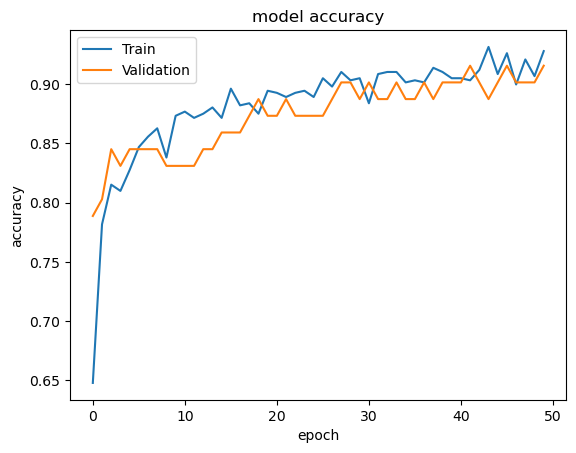

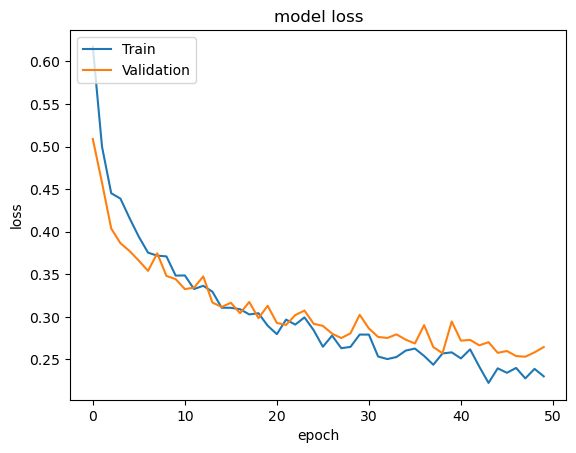

In [ ]:
# history for accuracy .
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# history for loss .
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# target data .
print('y_test = {}'.format(y_test))

# model prediction .
y_model = model.predict(X_test)
y_pred = np.argmax(y_model, axis = 1)
print('y_pred = {}'.format(y_pred))

y_test = [0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1]
3/3 [==============================] - 6s 1s/step
y_pred = [0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1
 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0]


In [ ]:
# evaluate model using test dataset .
model.evaluate(X_test, y_test)

3/3 [==============================] - 4s 1s/step - loss: 0.2458 - accuracy: 0.8873


[0.24578168988227844, 0.8873239159584045]


 Confusion Matrix:
[[36  2]
 [ 6 27]]


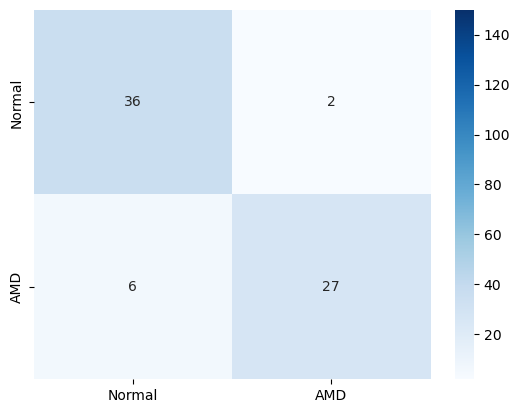

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# confusion matrix .
print('\n Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# plotting confusion matrix .
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, cmap='Blues', vmax = 150,
            fmt='g', xticklabels=['Normal', 'AMD'], yticklabels=['Normal', 'AMD'])
plt.show()


 Confusion Matrix:
[[36  2]
 [ 6 27]]

Accuracy: 0.8873239159584045
Sensitivity: 0.8181818181818182
Specificity: 0.9473684210526315
Total Training Time: 2024.16 seconds
F1 Score: 0.8709677419354839

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90        38
           1       0.93      0.82      0.87        33

    accuracy                           0.89        71
   macro avg       0.89      0.88      0.89        71
weighted avg       0.89      0.89      0.89        71



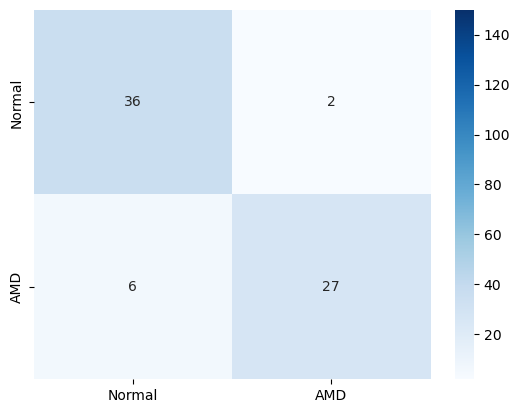

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# confusion matrix .
print('\n Confusion Matrix:')
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Sensitivity dan Specificity
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# F1 Score
f1_score = 2 * (sensitivity * (tp / (tp + fp))) / (sensitivity + (tp / (tp + fp)))

# Print Sensitivity, Specificity, dan F1 Score
print("\nAccuracy:", test_accuracy)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print(f"Total Training Time: {total_elapsed_time:.2f} seconds")
print("F1 Score:", f1_score)

# Print Classification Report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# plotting confusion matrix .
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, cmap='Blues', vmax = 150,
            fmt='g', xticklabels=['Normal', 'AMD'], yticklabels=['Normal', 'AMD'])
plt.show()